
# Assignment IV: Advanced CUDA
## [DD2360] Applied GPU Programming
Group 8

Valeria Grotto (vgrotto@kth.se) | Martin Forslund (uz6@kth.se)

***

## EX 2 - CUDA Streams


In [2]:
! git clone https://github.com/MoggmentuM/DD2360.git

Cloning into 'DD2360'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 172 (delta 53), reused 59 (delta 15), pack-reused 0
Receiving objects: 100% (172/172), 747.78 KiB | 2.61 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [3]:
# compile file
! nvcc /content/DD2360/hw_4/ex_2/vectorAdd.cu -o /content/DD2360/hw_4/ex_2/vectorAdd

In [4]:
! ./DD2360/hw_4/ex_2/vectorAdd 10000
! ./DD2360/hw_4/ex_2/vectorAdd 50000
! ./DD2360/hw_4/ex_2/vectorAdd 100000
! ./DD2360/hw_4/ex_2/vectorAdd 500000
! ./DD2360/hw_4/ex_2/vectorAdd 1000000
! ./DD2360/hw_4/ex_2/vectorAdd 5000000
! ./DD2360/hw_4/ex_2/vectorAdd 10000000
! ./DD2360/hw_4/ex_2/vectorAdd 50000000
! ./DD2360/hw_4/ex_2/vectorAdd 100000000

The input length is 10000
vecAdd<<<(313,1), (32,1)>>> elapsed 0.001348 sec
The input length is 50000
vecAdd<<<(1563,1), (32,1)>>> elapsed 0.000382 sec
The input length is 100000
vecAdd<<<(3125,1), (32,1)>>> elapsed 0.000762 sec
The input length is 500000
vecAdd<<<(15625,1), (32,1)>>> elapsed 0.002350 sec
The input length is 1000000
vecAdd<<<(31250,1), (32,1)>>> elapsed 0.003889 sec
The input length is 5000000
vecAdd<<<(156250,1), (32,1)>>> elapsed 0.023143 sec
The input length is 10000000
vecAdd<<<(312500,1), (32,1)>>> elapsed 0.050485 sec
The input length is 50000000
vecAdd<<<(1562500,1), (32,1)>>> elapsed 0.230922 sec
The input length is 100000000
vecAdd<<<(3125000,1), (32,1)>>> elapsed 0.344590 sec


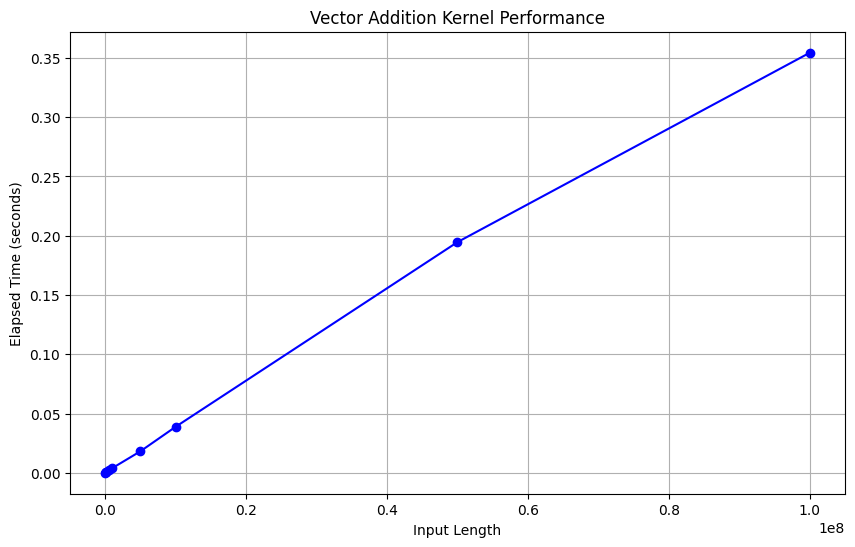

In [5]:
import matplotlib.pyplot as plt

# Input data
input_lengths = [10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
elapsed_times = [0.000211, 0.000401, 0.000741, 0.002352, 0.004046, 0.018286, 0.038933, 0.194611, 0.354245]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(input_lengths, elapsed_times, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Vector Addition Kernel Performance')
plt.xlabel('Input Length')
plt.ylabel('Elapsed Time (seconds)')

# Adding grid
plt.grid(True)

# Show plot
plt.show()


### Profiling without streams

In [6]:
# to output file
! nvprof --output-profile /content/DD2360/hw_4/ex_2/output_trace.nvvp -f ./DD2360/hw_4/ex_2/vectorAdd 90000000

The input length is 90000000
==693== NVPROF is profiling process 693, command: ./DD2360/hw_4/ex_2/vectorAdd 90000000
vecAdd<<<(2812500,1), (32,1)>>> elapsed 0.318156 sec
==693== Generated result file: /content/DD2360/hw_4/ex_2/output_trace.nvvp


In [7]:
! nvprof --print-gpu-trace ./DD2360/hw_4/ex_2/vectorAdd 90000000

The input length is 90000000
==734== NVPROF is profiling process 734, command: ./DD2360/hw_4/ex_2/vectorAdd 90000000
vecAdd<<<(2812500,1), (32,1)>>> elapsed 0.322791 sec
==734== Profiling application: ./DD2360/hw_4/ex_2/vectorAdd 90000000
==734== Profiling result:
   Start  Duration            Grid Size      Block Size     Regs*    SSMem*    DSMem*      Size  Throughput  SrcMemType  DstMemType           Device   Context    Stream  Name
356.11ms  154.50ms                    -               -         -         -         -  686.65MB  4.3401GB/s    Pageable      Device     Tesla T4 (0)         1         7  [CUDA memcpy HtoD]
510.84ms  155.36ms                    -               -         -         -         -  686.65MB  4.3162GB/s    Pageable      Device     Tesla T4 (0)         1         7  [CUDA memcpy HtoD]
666.21ms  10.344ms        (2812500 1 1)        (32 1 1)        16        0B        0B         -           -           -           -     Tesla T4 (0)         1         7  vecAdd(doubl

**Nvidia Nsight**

In [8]:
! /usr/local/cuda-11/bin/nv-nsight-cu-cli ./DD2360/hw_4/ex_2/vectorAdd 90000000

The input length is 90000000
==PROF== Connected to process 778 (/content/DD2360/hw_4/ex_2/vectorAdd)
==PROF== Profiling "vecAdd" - 0: 0%....50%....100% - 8 passes
vecAdd<<<(2812500,1), (32,1)>>> elapsed 0.932874 sec
==PROF== Disconnected from process 778
[778] vectorAdd@127.0.0.1
  vecAdd(double *, double *, double *, int), 2023-Dec-10 14:54:00, Context 1, Stream 7
    Section: GPU Speed Of Light Throughput
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.99
    SM Frequency                                                             cycle/usecond                         584.65
    Elapsed Cycles                                                                   cycle                      5,620,429
    Memory [%]                                                                           %           

### With Streams

In [26]:
# compile file
! nvcc --default-stream per-thread /content/DD2360/hw_4/ex_2/vectorAddStream.cu -o /content/DD2360/hw_4/ex_2/vectorAddStream

In [17]:
#run file
! ./DD2360/hw_4/ex_2/vectorAddStream 10000
! ./DD2360/hw_4/ex_2/vectorAddStream 50000
! ./DD2360/hw_4/ex_2/vectorAddStream 100000
! ./DD2360/hw_4/ex_2/vectorAddStream 500000
! ./DD2360/hw_4/ex_2/vectorAddStream 1000000
! ./DD2360/hw_4/ex_2/vectorAddStream 5000000
! ./DD2360/hw_4/ex_2/vectorAddStream 10000000
! ./DD2360/hw_4/ex_2/vectorAddStream 50000000
! ./DD2360/hw_4/ex_2/vectorAddStream 100000000

The input length is 10000
Segment Size: 64, Time: 0.002201 sec
Segment Size: 128, Time: 0.001884 sec
Segment Size: 256, Time: 0.001683 sec
Segment Size: 512, Time: 0.001634 sec

---------------------------------------------
The input length is 50000
Segment Size: 64, Time: 0.002181 sec
Segment Size: 128, Time: 0.001788 sec
Segment Size: 256, Time: 0.001722 sec
Segment Size: 512, Time: 0.002029 sec

---------------------------------------------
The input length is 100000
Segment Size: 64, Time: 0.002199 sec
Segment Size: 128, Time: 0.001789 sec
Segment Size: 256, Time: 0.001670 sec
Segment Size: 512, Time: 0.001712 sec

---------------------------------------------
The input length is 500000
Segment Size: 64, Time: 0.001595 sec
Segment Size: 128, Time: 0.001163 sec
Segment Size: 256, Time: 0.001079 sec
Segment Size: 512, Time: 0.001112 sec

---------------------------------------------
The input length is 1000000
Segment Size: 64, Time: 0.001560 sec
Segment Size: 128, Time: 0.001222 sec

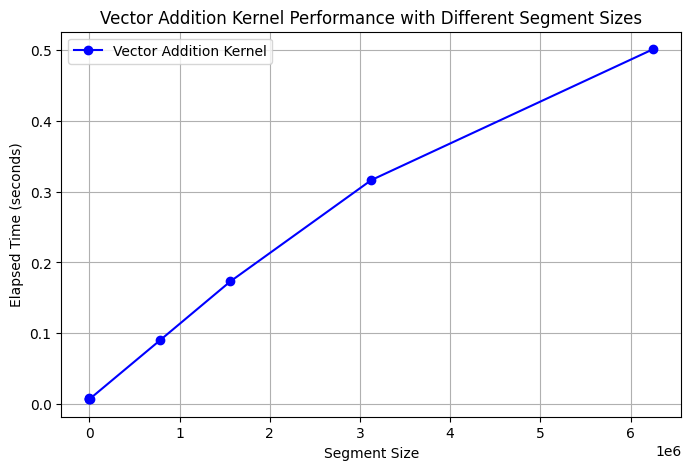

In [25]:
import matplotlib.pyplot as plt

# Updated set of data
segment_sizes = [64, 128, 512, 2048, 781250, 1562500, 3125000, 6250000]
elapsed_times = [0.008411, 0.006878, 0.006827, 0.007139, 0.089977, 0.173244, 0.316354, 0.501249]

# Plotting
plt.figure(figsize=(8, 5))

# Updated line with the new data
plt.plot(segment_sizes, elapsed_times, marker='o', linestyle='-', color='b', label='Vector Addition Kernel')

# Adding labels and title
plt.title('Vector Addition Kernel Performance with Different Segment Sizes')
plt.xlabel('Segment Size')
plt.ylabel('Elapsed Time (seconds)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()


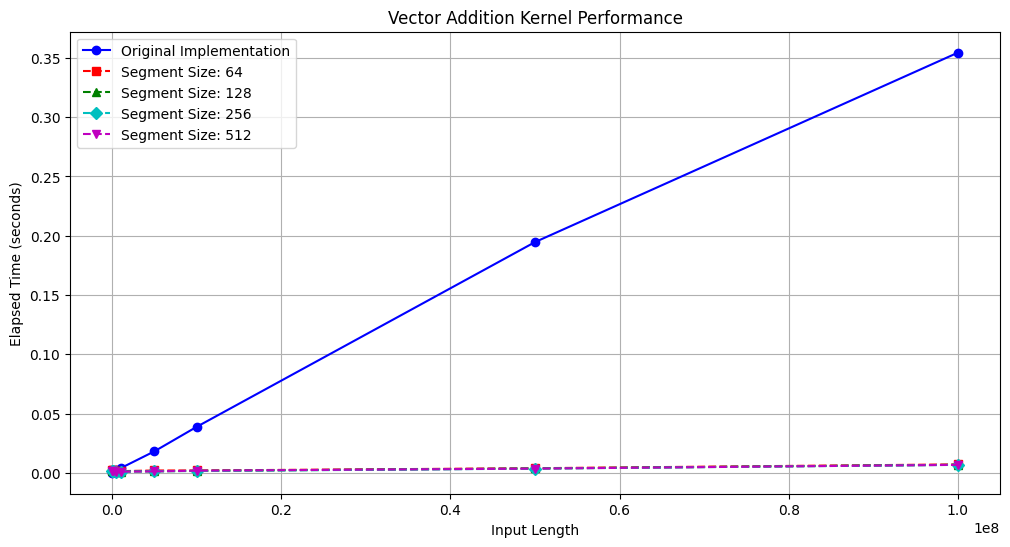

In [19]:
import matplotlib.pyplot as plt

# First set of data
input_lengths = [10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
elapsed_times = [0.000211, 0.000401, 0.000741, 0.002352, 0.004046, 0.018286, 0.038933, 0.194611, 0.354245]

# Second set of data
input_lengths_segment = [10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
elapsed_times_segment_64 = [0.002201, 0.002181, 0.002199, 0.001595, 0.001560, 0.002100, 0.002103, 0.004019, 0.007236]
elapsed_times_segment_128 = [0.001884, 0.001788, 0.001789, 0.001163, 0.001222, 0.001464, 0.001777, 0.003771, 0.006919]
elapsed_times_segment_256 = [0.001683, 0.001722, 0.001670, 0.001079, 0.001151, 0.001436, 0.001652, 0.003656, 0.006821]
elapsed_times_segment_512 = [0.001634, 0.002029, 0.001712, 0.001112, 0.001130, 0.001347, 0.001942, 0.003680, 0.006846]

# Plotting
plt.figure(figsize=(12, 6))

# First line
plt.plot(input_lengths, elapsed_times, marker='o', linestyle='-', color='b', label='Original Implementation')

# Second line (with different segment sizes)
plt.plot(input_lengths_segment, elapsed_times_segment_64, marker='s', linestyle='--', color='r', label='Segment Size: 64')
plt.plot(input_lengths_segment, elapsed_times_segment_128, marker='^', linestyle='--', color='g', label='Segment Size: 128')
plt.plot(input_lengths_segment, elapsed_times_segment_256, marker='D', linestyle='--', color='c', label='Segment Size: 256')
plt.plot(input_lengths_segment, elapsed_times_segment_512, marker='v', linestyle='--', color='m', label='Segment Size: 512')

# Adding labels and title
plt.title('Vector Addition Kernel Performance')
plt.xlabel('Input Length')
plt.ylabel('Elapsed Time (seconds)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()


In [16]:
# to output file
! nvprof --output-profile /content/DD2360/hw_4/ex_2/nvvp_traces/stream_trace.nvvp -f ./DD2360/hw_4/ex_2/vectorAddStream 90000000

The input length is 90000000
==1556== NVPROF is profiling process 1556, command: ./DD2360/hw_4/ex_2/vectorAddStream 90000000
Segment Size: 64, Time: 0.015475 sec
Segment Size: 128, Time: 0.015375 sec
Segment Size: 256, Time: 0.021342 sec
Segment Size: 512, Time: 0.023510 sec

---------------------------------------------
==1556== Generated result file: /content/DD2360/hw_4/ex_2/nvvp_traces/stream_trace.nvvp


In [15]:
! /usr/local/cuda-11/bin/nv-nsight-cu-cli ./DD2360/hw_4/ex_2/vectorAddStream 90000000

The input length is 90000000
==PROF== Connected to process 1512 (/content/DD2360/hw_4/ex_2/vectorAddStream)
==PROF== Profiling "vecAdd" - 0: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 2: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 3: 0%....50%....100% - 8 passes
Segment Size: 64, Time: 0.736128 sec
==PROF== Profiling "vecAdd" - 4: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 5: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 6: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 7: 0%....50%....100% - 8 passes
Segment Size: 128, Time: 0.575970 sec
==PROF== Profiling "vecAdd" - 8: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 9: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 10: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 11: 0%....50%....100% - 8 passes
Segment Size: 256, Time: 0.561801 sec
==PROF== Profiling "vecAdd" - 12: